In [105]:
# Load data
data = pd.read_csv('historical_sales_data123.csv')

data.info()
print(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Material         300 non-null    object
 1   Cost             300 non-null    int64 
 2    Supplier        300 non-null    object
 3    Lead Time       300 non-null    object
 4    Order Quantity  300 non-null    int64 
 5    Order Date      300 non-null    object
 6    Delivery Date   300 non-null    object
 7    Market Trends   300 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 18.9+ KB
                         Material      Cost       Supplier  Lead Time  \
0     BH150E Electric Dump Truck    1100000       BEML KGF     3 days   
1     BE1800E Electric Excavator   10200000    BEML B'LORE     4 days   
2                 BD50 Bulldozer    1350000  BEML PALAKKAD     3 days   
3     BH205E Electric Haul Truck   15600000    BEML MYSURU     4 days   
4             BG605 Motor Grad

In [90]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from datetime import datetime


In [106]:
label_encoder = LabelEncoder()
data['Supplier_Encoded'] = label_encoder.fit_transform(data.iloc[:,[2]])
data['Lead_time_Encoded'] = label_encoder.fit_transform(data.iloc[:,[3]])
# Print the encoded DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Material           300 non-null    object
 1   Cost               300 non-null    int64 
 2    Supplier          300 non-null    object
 3    Lead Time         300 non-null    object
 4    Order Quantity    300 non-null    int64 
 5    Order Date        300 non-null    object
 6    Delivery Date     300 non-null    object
 7    Market Trends     300 non-null    int64 
 8   Supplier_Encoded   300 non-null    int32 
 9   Lead_time_Encoded  300 non-null    int32 
dtypes: int32(2), int64(3), object(5)
memory usage: 21.2+ KB
None


C:\Users\PREETHIMA KRISHNA\anaconda old\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PREETHIMA KRISHNA\anaconda old\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
data[' Order Date'] = pd.to_datetime(data[' Order Date'],infer_datetime_format=True).astype('int64')
data[' Delivery Date'] = pd.to_datetime(data[' Delivery Date'],infer_datetime_format=True).astype('int64')

In [109]:
# Define input and output variables
X = data.drop(["Material"," Lead Time"," Supplier"], axis=1)
y = data.iloc[:,[1]]



In [110]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [111]:

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [112]:

# Make predictions on test set
y_pred = model.predict(X_test)



In [113]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")



Root Mean Squared Error: 5.327134259012137e-07


In [115]:
# Use model to make predictions for future data
future_data = pd.read_csv('future.csv')
future_data['Supplier_Encoded'] = label_encoder.fit_transform(future_data.iloc[:,[2]])
future_data['Lead_time_Encoded'] = label_encoder.fit_transform(future_data.iloc[:,[3]])

future_data[' Delivery Date'] = pd.to_datetime(future_data[' Delivery Date'], format='%d-%m-%Y')
future_data[' Delivery Date'] = future_data[' Delivery Date'].astype('int64')

future_data[' Order Date'] = pd.to_datetime(future_data[' Order Date'], format='%d-%m-%Y')
future_data[' Order Date'] = future_data[' Order Date'].astype('int64')
future_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Material           300 non-null    object
 1   Cost               300 non-null    int64 
 2    Supplier          300 non-null    object
 3    Lead Time         300 non-null    object
 4    Order Quantity    300 non-null    int64 
 5    Order Date        300 non-null    int64 
 6    Delivery Date     300 non-null    int64 
 7    Market Trends     300 non-null    int64 
 8   Supplier_Encoded   300 non-null    int32 
 9   Lead_time_Encoded  300 non-null    int32 
dtypes: int32(2), int64(5), object(3)
memory usage: 21.2+ KB


C:\Users\PREETHIMA KRISHNA\anaconda old\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PREETHIMA KRISHNA\anaconda old\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
future_data=future_data.drop(["Material"," Lead Time"," Supplier"], axis=1)


future_predictions = model.predict(future_data)


In [117]:
# Print predicted costs for each material
materials=data["Material"].tolist()
for i, cost in enumerate(future_predictions):
    print(f'Material {materials[i]}: Predicted Cost={int(cost)}')

Material  BH150E Electric Dump Truck : Predicted Cost=1099999
Material BE1800E Electric Excavator : Predicted Cost=10199999
Material  BD50 Bulldozer : Predicted Cost=1349999
Material BH205E Electric Haul Truck : Predicted Cost=15599999
Material BG605 Motor Grader : Predicted Cost=24499999
Material BH200E Electric Excavator : Predicted Cost=8749999
Material BD80 Bulldozer : Predicted Cost=19999999
Material BH300E Electric Excavator : Predicted Cost=21999999
Material BH205i Haul Truck : Predicted Cost=25599999
Material BPR45 Piling Rig : Predicted Cost=22499999
Material BH100E Electric Dump Truck : Predicted Cost=11999999
Material BH85E Electric Bulldozer : Predicted Cost=27999999
Material BG405A Motor Grader : Predicted Cost=27999999
Material BH150E AC Electric Dump Truck : Predicted Cost=1099999
Material BD80 Bulldozer : Predicted Cost=19999999
Material BH300E Electric Excavator : Predicted Cost=21999999
Material BH205i Haul Truck : Predicted Cost=25599999
Material BPR45 Piling Rig : P

C:\Users\PREETHIMA KRISHNA\AppData\Local\Temp\ipykernel_12972\3154734223.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(materials, rotation=60, ha='right')


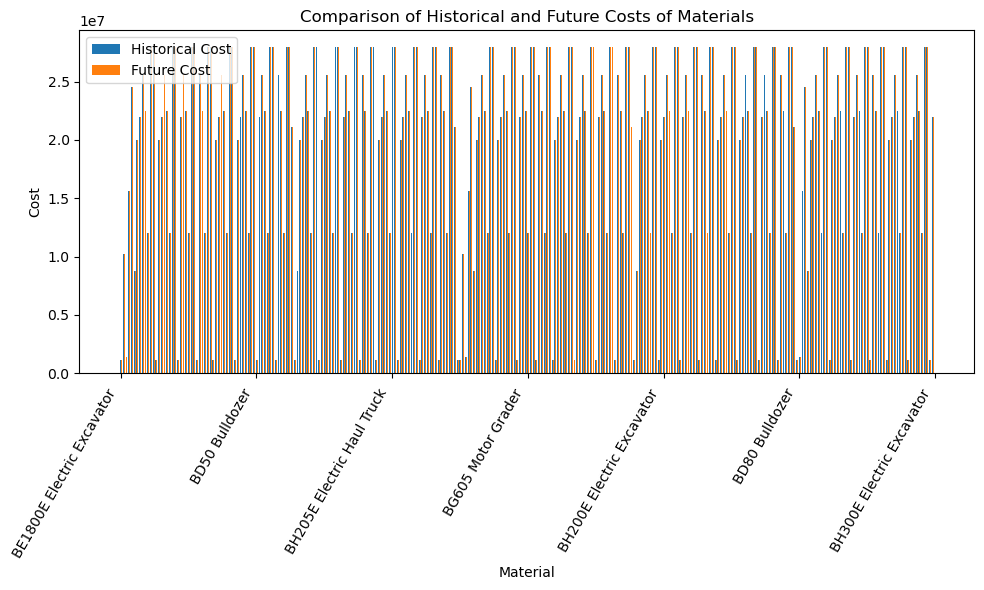

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Data
materials = data["Material"].tolist()

historical_costs = data["Cost"].tolist()
future_costs = future_data["Cost"].tolist()

# Set the width of each bar
bar_width = 0.35

# Set the x positions of the bars
x = np.arange(len(materials))

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
historical_bar = ax.bar(x, historical_costs, bar_width, label='Historical Cost')
future_bar = ax.bar(x + bar_width, future_costs, bar_width, label='Future Cost')

# Set labels and title
ax.set_xlabel('Material')
ax.set_ylabel('Cost')
ax.set_title('Comparison of Historical and Future Costs of Materials')
# ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(materials, rotation=60, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
